<a href="https://colab.research.google.com/github/LucasMonteiroBastos/Analise-de-Credito---Part-I/blob/main/ANALISE_DE_CREDITO_PREDIZER_SE_A_PESSOA_PAGOU_OU_N%C3%83O_O_EMPR%C3%89STIMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
# Libs necessarias 

# Matriz e Modelagem
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

CARREGANDO BASE DE DADOS

In [2]:
# Carregando a Base de Dados
Base_De_Dados = pd.read_csv('/content/credit_data.csv')

In [3]:
# Lendo a Base de Dados
Base_De_Dados.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
# clientid -> cliente
# income -> renda / salario 
# age -> idade
# loan -> emprestimo
# default -> inadiplente

In [5]:
# estatisticas
Base_De_Dados.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [6]:
# buscando a pessoa com maior renda
Base_De_Dados[Base_De_Dados['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [7]:
# buscando a pessoa com a menor divida
Base_De_Dados[Base_De_Dados['loan']  <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


In [8]:
# contagem de registros na classe 'default'
np.unique(Base_De_Dados['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

VISUALIZAÇÃO DOS DADOS

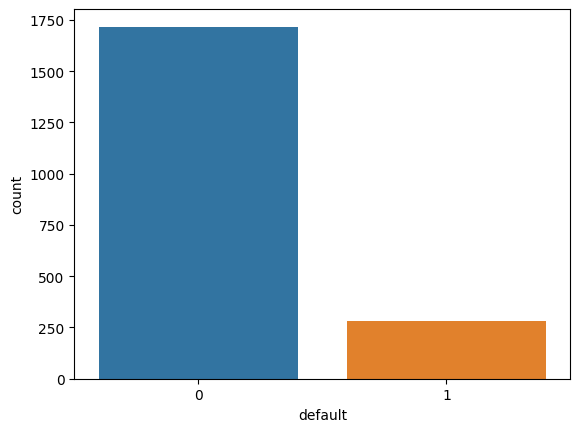

In [9]:
# contagem de registros na classe 'default'
sns.countplot(x=Base_De_Dados['default']);

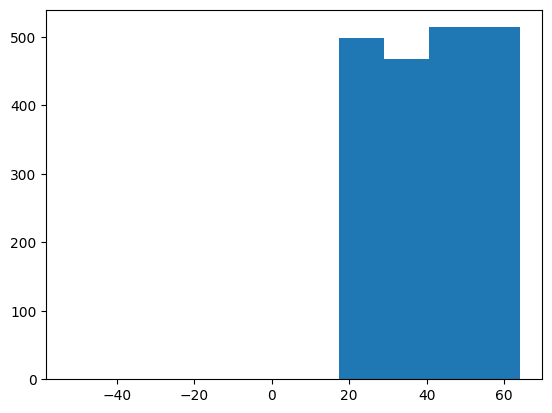

In [10]:
# distribuição de idade na Base de Dados
plt.hist(x = Base_De_Dados['age']);

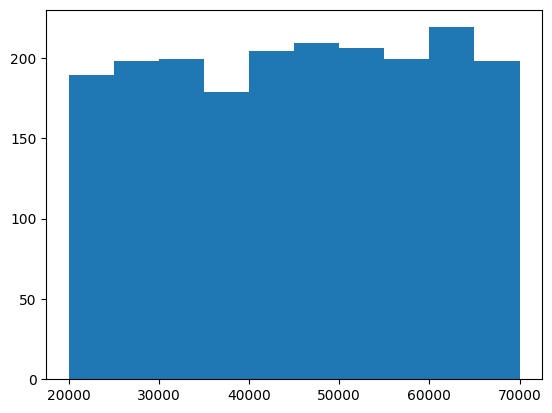

In [11]:
# distribuição de renda
plt.hist(x=Base_De_Dados['income']);

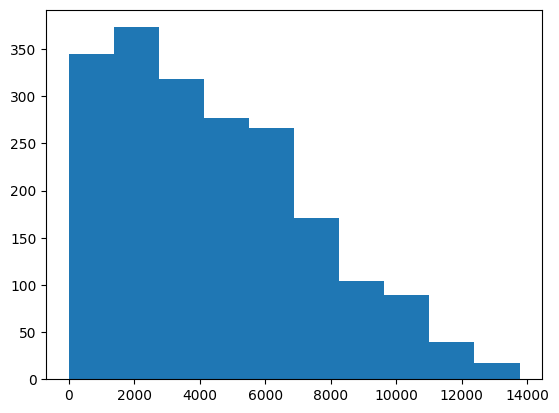

In [12]:
  # distribuição das dividas
  plt.hist(x=Base_De_Dados['loan']);

In [13]:
# Gráfico de dispersão Idade x Renda
grafico = px.scatter_matrix(Base_De_Dados, dimensions=['age', 'income', 'loan'], color='default')
grafico.show();

TRATAMENTO DE VALORES INCONSISTENTES

In [14]:
# Localizando as idades que são menores que ZERO
Base_De_Dados.loc[Base_De_Dados['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [15]:
# TECNICA 1º FRACO


# apagando a coluna inteira (de todos os registros da base de dados)
Base_De_Dados2 = Base_De_Dados.drop('age', axis= 1)
Base_De_Dados2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [16]:
# Identificando no index, quais são as idades menor que ZERO
Base_De_Dados[Base_De_Dados['age'] < 0].index

Int64Index([15, 21, 26], dtype='int64')

In [17]:
# TECNICA 2º MEIO - FRACO



# Apagando somente os registros com valores incosistentes

# Dropando na Base de Dados os Index onde a idade é menor que ZERO
Base_De_Dados3 = Base_De_Dados.drop(Base_De_Dados[Base_De_Dados['age'] < 0].index)
Base_De_Dados3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [18]:
# confirmando as alterações
Base_De_Dados3.loc[Base_De_Dados3['age'] < 0]

,clientid,income,age,loan,default


In [19]:
# TECNICA 3º BOM E MAIS RECOMENDADO

# Preencher os valores inconsistentes manualmente com a media das idades

# Buscando a media de todos os atributos / classes
Base_De_Dados.mean()



clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [20]:
# buscando a media das idades maiores que ZERO
Base_De_Dados['age'][Base_De_Dados['age'] > 0].mean() 

40.92770044906149

In [21]:
# atribuindo a media de idade aos valores que são menores que ZERO
Base_De_Dados.loc[Base_De_Dados['age'] < 0,'age'] = 40.92

In [22]:
# certificando as alterações
Base_De_Dados.loc[Base_De_Dados['age'] < 0]

,clientid,income,age,loan,default


In [23]:
Base_De_Dados.head(30)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


TRATAMENTO DE VALORES FALTANTES

In [24]:
# Buscando valores nulos na base
Base_De_Dados.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [25]:
# Buscando apenas os valores nulos na coluna age
Base_De_Dados.loc[pd.isnull(Base_De_Dados['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [26]:
# Preenchendo os valores nulos na coluna age com a media da idade
Base_De_Dados['age'].fillna(Base_De_Dados['age'].mean(), inplace=True)

In [27]:
# Verificando as modificações
Base_De_Dados.loc[(Base_De_Dados['clientid'] == 29) | (Base_De_Dados['clientid'] == 30) | (Base_De_Dados['clientid'] == 31)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
29,30,58842.891308,54.510948,10871.186790,0
30,31,48528.852796,40.927689,6155.784670,0


In [28]:
# Consultando as modificações de outra maneira
Base_De_Dados.loc[Base_De_Dados['clientid'].isin([29, 30, 31])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
29,30,58842.891308,54.510948,10871.186790,0
30,31,48528.852796,40.927689,6155.784670,0


DIVISÃO ENTRE OS PROVISORES E A CLASSE


In [29]:
# Passando a variavel X como os previsores
X_credit = Base_De_Dados.iloc[:, 1:4].values

In [30]:
# Verificando
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [31]:
# Atribuindo a classe a variavel Y
y_credit = Base_De_Dados.iloc[:, 4].values

In [32]:
# Verificando
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [33]:
# menor renda           # menor idade         # menor divida
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [34]:
#mair renda           #maior idade            #maior divida
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [35]:
# Aplicando a padronizão entre os dados
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [36]:
# Verificando as mudanças nos valores minimos
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [37]:
# Verificando as mudanças nos valores maximos
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

  DIVISÃO DA BASE EM TREINAMENTO E TESTE


In [38]:
# libs para dividi entre treino e teste
from sklearn.model_selection import train_test_split

In [39]:
# dividindo entre X treino e y teste
X_credito_treinamento, X_credito_teste, y_credito_treinamento, y_credito_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)


In [40]:
# analisando shape de X 
X_credito_treinamento.shape

(1500, 3)

In [41]:
# analisando o shaoe de y
y_credito_treinamento.shape

(1500,)

In [42]:
# analisando o shape de X teste e y treino
X_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

SALVANDO A BASE DE DADOS JÁ PRE-PROCESSADA E TRATADA

In [43]:
import pickle
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credito_treinamento, y_credito_treinamento, X_credito_teste, y_credito_teste], f)



TRABALHANDO NA BASE JÁ PRÉ-PROCESSADA E TRATADA


In [44]:
# lendo a base tratada
#with open('credit.pkl', 'rb') as f:
  #X_credito_treinamento, y_credito_treinamento, X_credito_teste, y_credito_teste = pickle.load(f)

In [45]:
# analisando x treino e y teste
X_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [46]:
# analisando a base de teste
X_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

In [47]:
# analisando o shape TREINAMENTO

# X -> atributos previsores |income|age|loan
# y -> somente a classe default 0|1
X_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [48]:
# analisando o shape de TESTE
X_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

IMPLEMENTANDO O ALGORITMO NAIVE BAYES

In [49]:
# importando o algoritmo Naive Bayes
from sklearn.naive_bayes import GaussianNB

# isntalanciando uma variavel
# naive_credit_data está recebendo uma instancia de GaussianNB
naive_credito_data = GaussianNB()
naive_credito_data.fit(X_credito_treinamento, y_credito_treinamento)

GaussianNB()

In [50]:
previsoes = naive_credito_data.predict(X_credito_teste)

In [51]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
accuracy_score(y_credito_teste, previsoes)

0.938

In [55]:
confusion_matrix(y_credito_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [56]:
from yellowbrick.classifier import ConfusionMatrix

0.938

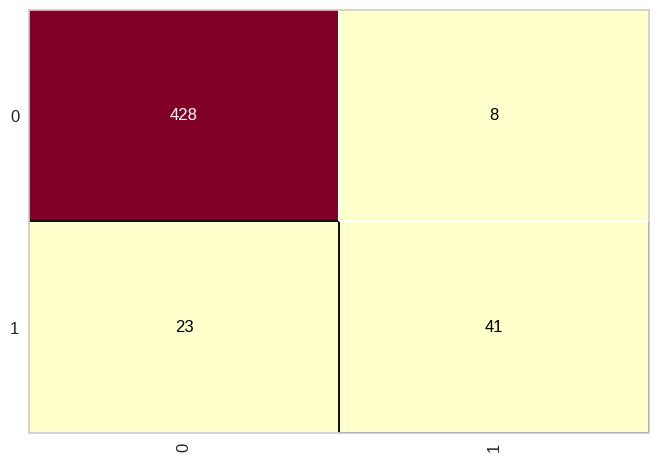

In [57]:
cm = ConfusionMatrix(naive_credito_data)
cm.fit(X_credito_treinamento, y_credito_treinamento)
cm.score(X_credito_teste, y_credito_teste)

In [58]:
 print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



CRIANDO A ARVORE DE DECISÃO

In [59]:
# implementando o algoritmo
from sklearn.tree import DecisionTreeClassifier

In [60]:
# criando a arvore de decisão                                         o rando state é: sempre que rodar o algoritmo ele sempre mostrar os mesmos resultados
arvore_credito = DecisionTreeClassifier(criterion='entropy', random_state=0)

# fazendo o treinamento
arvore_credito.fit(X_credito_treinamento, y_credito_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [61]:
# fazendo as previsões
previsoes = arvore_credito.predict(X_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
# fazendo a comparação 
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

ANALISANDO AS METRICAS

In [63]:
# libs
from sklearn.metrics import accuracy_score, classification_report

In [64]:
# calculando a acuracia // taxa de acerto
accuracy_score(y_credito_teste, previsoes)

0.982

GERANDO A MATRIX DE CONFUSÃO


0.982

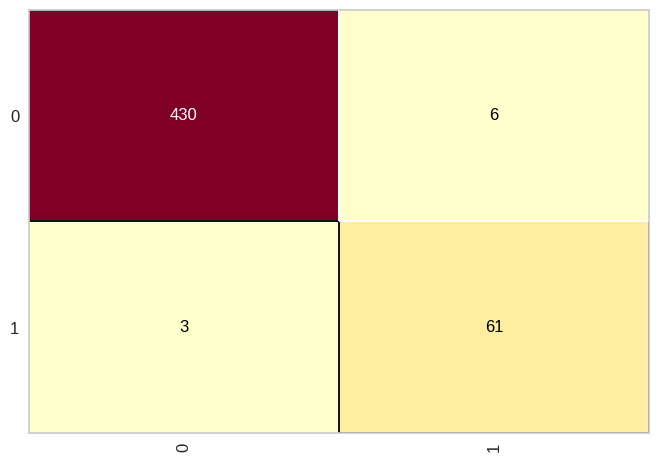

In [65]:
# criando matriz
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credito)
cm.fit(X_credito_treinamento, y_credito_treinamento)
cm.score(X_credito_teste, y_credito_teste)

In [66]:
# visualizando o classficador de reporte
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



VISUALIZANDO A ARVORE DE DECISÃO

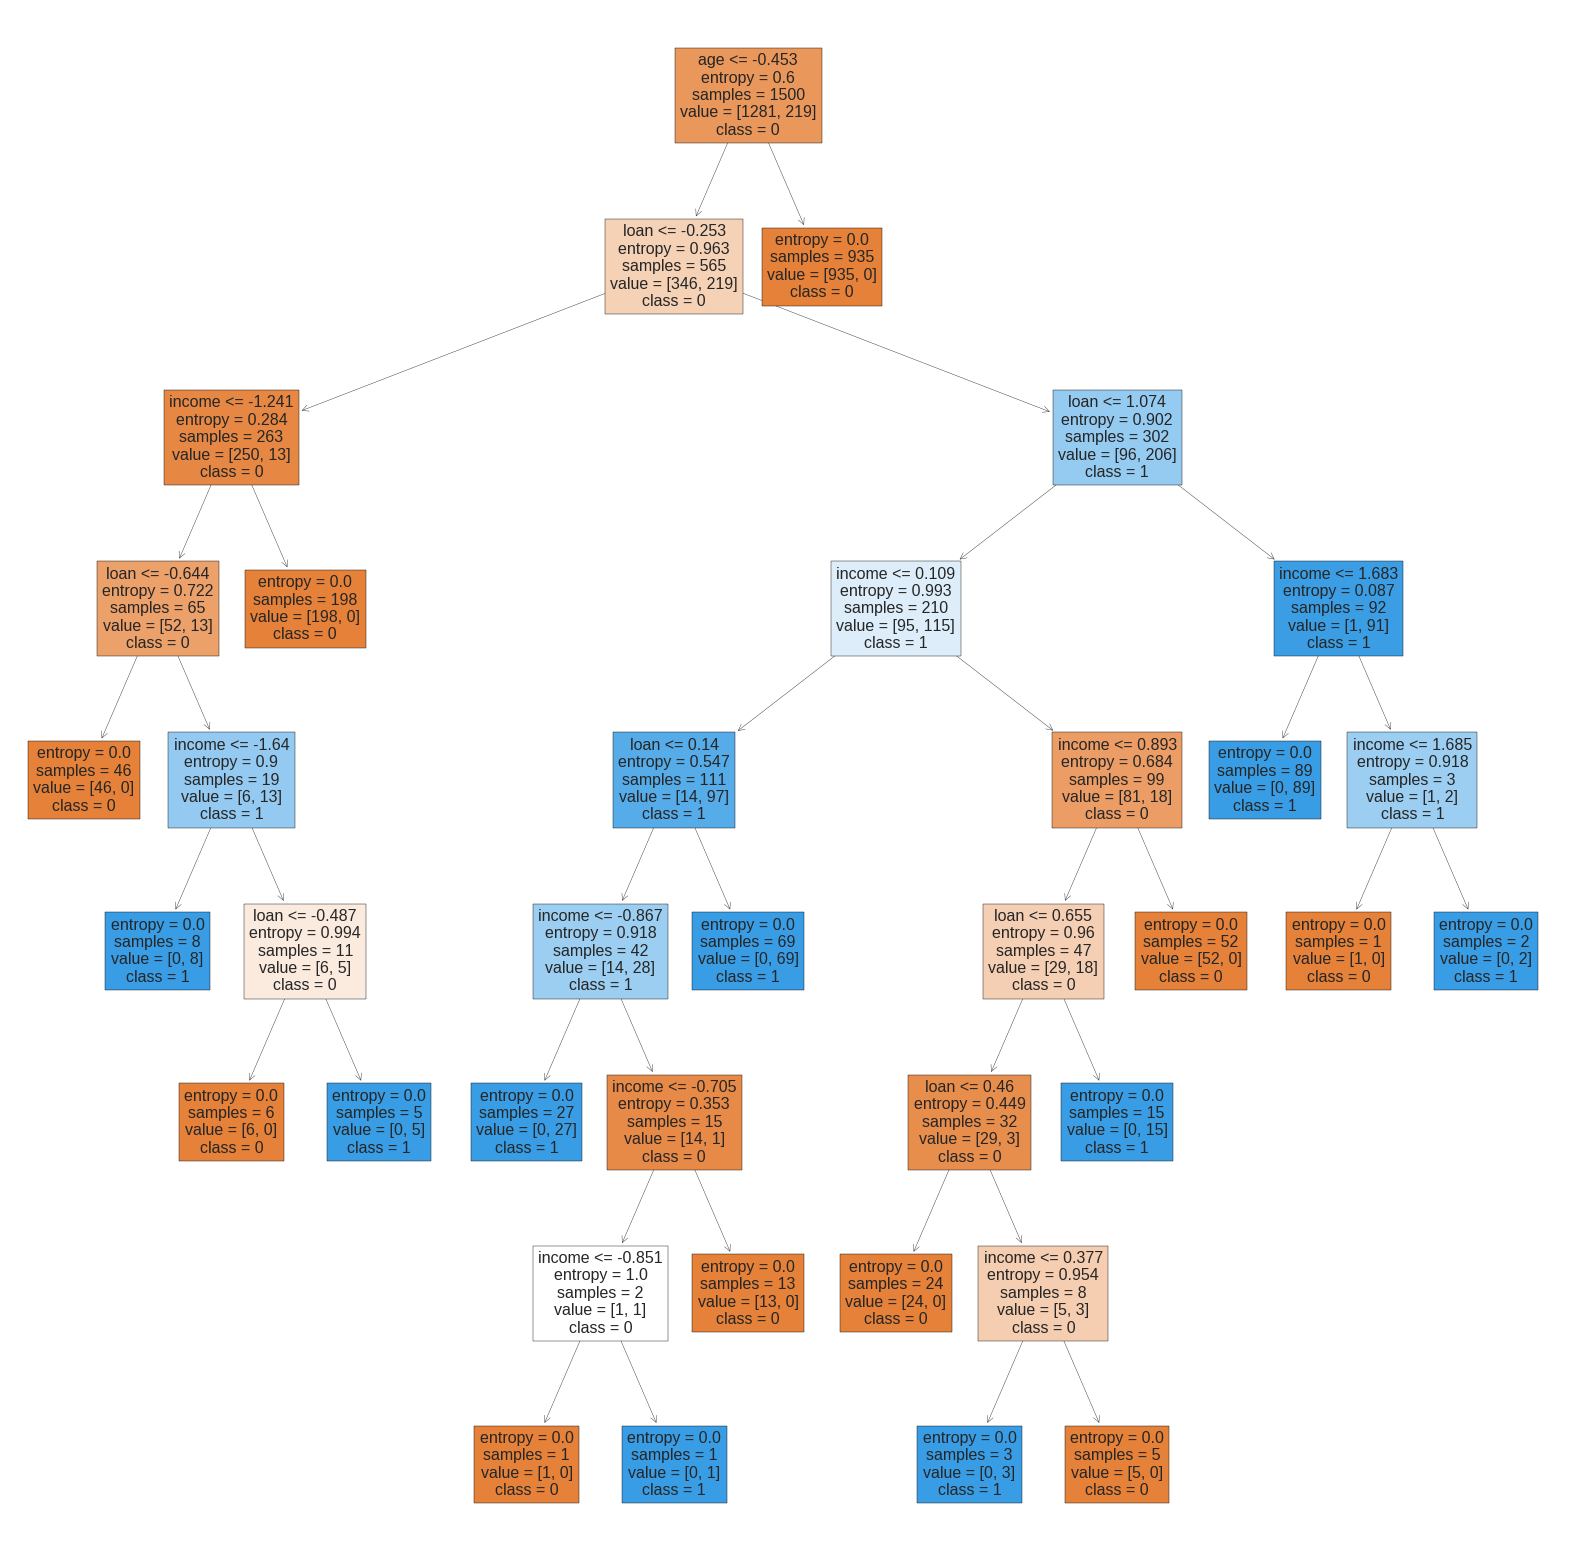

In [67]:
# implementando a arvore
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20))
tree.plot_tree(arvore_credito, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credito.png')


IMPLEMENTANDO O ALGORITMO RANDOM FOREST

In [68]:
# libs
from sklearn.ensemble import RandomForestClassifier

In [69]:
# usando 1500 registros para treinar
X_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [70]:
# usando 500 registro para fazer a avaliação
X_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

In [71]:
# criando o random forest
random_forest_credito = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)

In [72]:
# fazendo o treinamento
random_forest_credito.fit(X_credito_treinamento, y_credito_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [73]:
# previsoes
previsoes = random_forest_credito.predict(X_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [74]:
# respostas reais
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [75]:
# metricas
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credito_teste, previsoes)

0.984

0.984

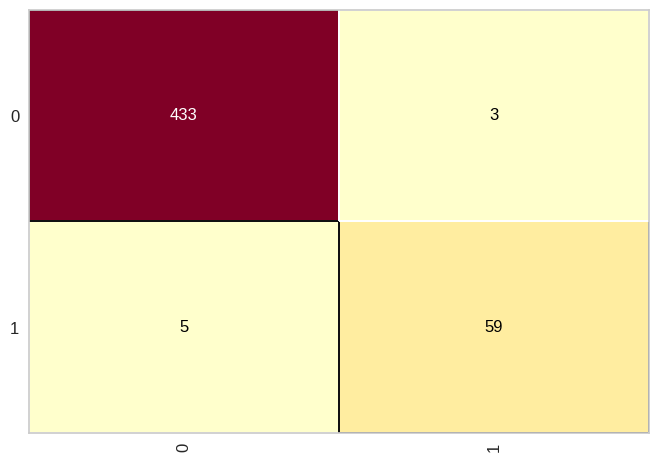

In [76]:
# matrix de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credito)
cm.fit(X_credito_treinamento, y_credito_treinamento)
cm.score(X_credito_teste, y_credito_teste)

In [77]:
# classification reportes
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



In [78]:
# quantidade de registros para treino
X_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [79]:
# quantidade de registros para testar
X_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

IMPLEMANTANDO O ALGORITMO KNN

In [80]:
# importando o Knn
from sklearn.neighbors import KNeighborsClassifier

In [81]:
# criando o modelo
knn_credito = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credito.fit(X_credito_treinamento, y_credito_treinamento)

KNeighborsClassifier()

In [82]:
# fazendo as previsoes ou classficação
previsoes = knn_credito.predict(X_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [83]:
# respostas reais na base de dados
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [84]:
# calculando a acuracia
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credito_teste, previsoes)
# ESSE RESULTADO SÓ FOI POSSIVEL POR MEIO DA PADRONIZAÇÃO 

0.986

0.986

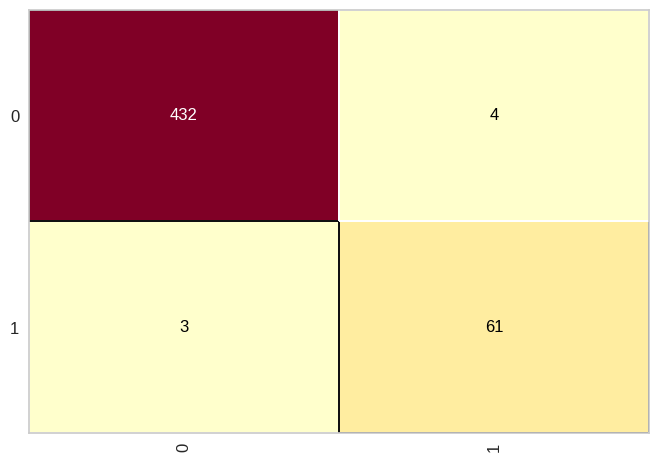

In [85]:
# visualizando a matrix de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credito)
cm.fit(X_credito_treinamento, y_credito_treinamento)
cm.score(X_credito_teste, y_credito_teste)

In [86]:
# analisando o classfication report
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



APLICABILIDADE DO ALGORITMO: REGRESSÃO LOGISTICA

In [87]:
X_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

IMPLEMENTANDO O ALGORITMO: REGRESSÃO LOGISTICA

In [88]:
X_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [89]:
X_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

In [90]:
# criando a regressão logistica
from sklearn.linear_model import LogisticRegression
logistic_credito = LogisticRegression(random_state=1)

In [91]:
# fazendo o treinamento
logistic_credito.fit(X_credito_treinamento, y_credito_treinamento)

LogisticRegression(random_state=1)

In [92]:
previsoes = logistic_credito.predict(X_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [93]:
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [94]:
# taxa de acerto
from sklearn.metrics import accuracy_score, classification_report

In [95]:
accuracy_score(y_credito_teste, previsoes)

0.946

0.946

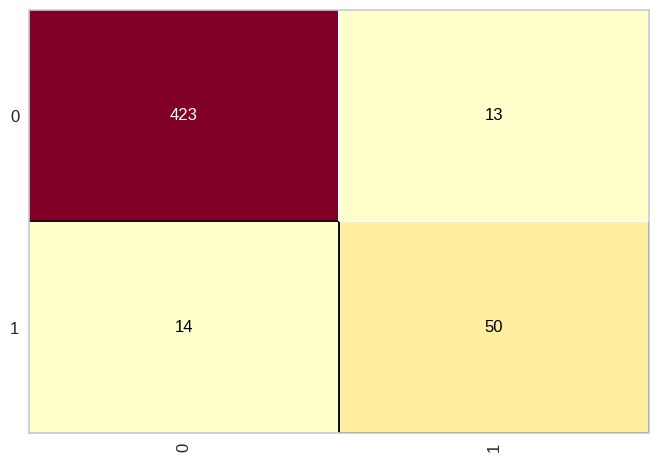

In [96]:
# matrix de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credito)
cm.fit(X_credito_treinamento, y_credito_treinamento)
cm.score(X_credito_teste, y_credito_teste)

In [97]:
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



IMPLEMENTANDO O ALGORITMO; SUPORTE VECTOR MACHINE (SVM)

In [98]:
# importando a biblioteca
from sklearn.svm import SVC

# criando o algoritmo
svm_credito = SVC(kernel='rbf', random_state=1, C = 2.0)

# fazendo o treinamento
svm_credito.fit(X_credito_treinamento, y_credito_treinamento)

SVC(C=2.0, random_state=1)

In [99]:
# fazendo a previsão
previsoes = svm_credito.predict(X_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [100]:
# analisando o valor real
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [101]:
# analisando a taxa de acerto
from sklearn.metrics import accuracy_score, classification_report

# comparando
accuracy_score(y_credito_teste, previsoes)

0.988

0.988

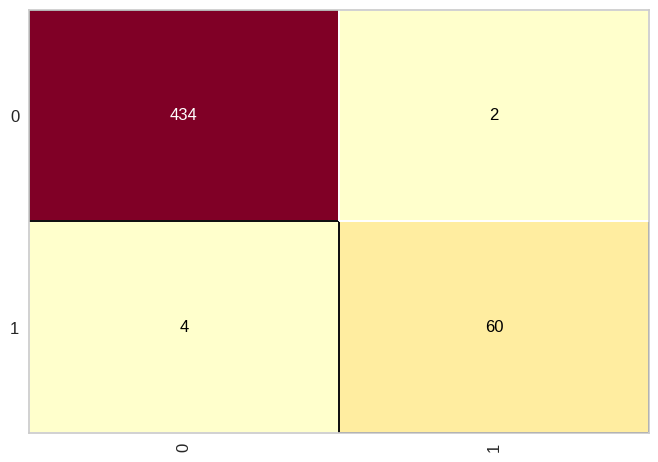

In [102]:
# criando a matrix de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credito)
cm.fit(X_credito_treinamento, y_credito_treinamento)
cm.score(X_credito_teste, y_credito_teste)

In [103]:
# classfication reporte
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



REDES NEURAIS ARTIFICIAIS


In [104]:
# import libs
from sklearn.neural_network import MLPClassifier  

In [105]:
# implementando a rede neural
rede_neural_credito = MLPClassifier()

# fazendo o treinamento
rede_neural_credito.fit(X_credito_treinamento, y_credito_treinamento)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier()

In [106]:
# fazendo as previsoes
previsoes = rede_neural_credito.predict(X_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [107]:
# fazendo o comparativo com o valor real
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [108]:
# taxa de acerto
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credito_teste, previsoes)

0.994

0.994

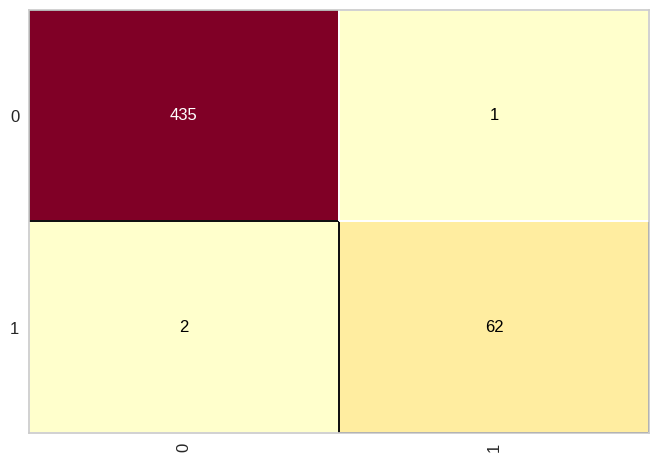

In [109]:
# matrix de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credito)
cm.fit(X_credito_treinamento, y_credito_treinamento)
cm.score(X_credito_teste, y_credito_teste)

In [110]:
# visualiando o classification report
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      0.97      0.98        64

    accuracy                           0.99       500
   macro avg       0.99      0.98      0.99       500
weighted avg       0.99      0.99      0.99       500



  TUNING DOS PARAMETROS COM GRIDRESEARCH

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # arvore de decisão
from sklearn.ensemble import RandomForestClassifier # floresta aleatoria
from sklearn.neighbors import KNeighborsClassifier # k-vizinhos mais proximos
from sklearn.linear_model import LogisticRegression # regressão logistica
from sklearn.svm import SVC # suporte vector machine
from sklearn.neural_network import MLPClassifier # rede neural

In [112]:
# fazendo o check da base treinamento
X_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [113]:
# fazendo o check da base teste
X_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

In [114]:
# fazendo a concatenação das duas bases, para fazer a validação cruzada
X_credito = np.concatenate((X_credito_treinamento,X_credito_teste), axis = 0)
X_credito.shape

(2000, 3)

In [115]:
y_credito = np.concatenate((y_credito_treinamento, y_credito_teste), axis = 0)
y_credito.shape

(2000,)

ARVORE DE DECISÃO

In [116]:
# parametros
parametros = {'criterion':['gini','entropy'],
              'splitter':['best','radom'],
              'min_samples_split':[2, 5, 10],
              'min_samples_leaf':[1, 5, 10]}

In [117]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credito, y_credito)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_p

VALIDAÇÃO CRUZADA

In [118]:
# implementando a validação cruzada
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []




for i in range(30):
  print(i)
  # dividir a base de dados
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  # tuning arvore
  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credito, y_credito, cv = kfold)

  resultados_arvore.append(scores.mean())

  
  # random forest
  random_forest = RandomForestClassifier(criterion ='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
  scores = cross_val_score(random_forest, X_credito, y_credito, cv = kfold)
  resultados_random_forest.append(scores.mean())

  # knn
  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credito, y_credito, cv = kfold)
  resultados_knn.append(scores.mean())

  # regressão logistica
  logistica = LogisticRegression(C =1.0, solver = 'lbfgs', tol = 0.00001)
  scores = cross_val_score(logistica, X_credito, y_credito, cv = kfold)
  resultados_logistica.append(scores.mean())

  # svm
  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credito, y_credito, cv = kfold)
  resultados_svm.append(scores.mean())


  # rede neural
  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credito, y_credito, cv = kfold)
  resultados_rede_neural.append(scores.mean())

In [120]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede neural': resultados_rede_neural})
resultados 

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
0,0.9860,0.9825,0.9815,0.9475,0.9845,0.9975
1,0.9845,0.9825,0.9800,0.9465,0.9840,0.9975
2,0.9905,0.9845,0.9795,0.9470,0.9865,0.9970
3,0.9875,0.9835,0.9780,0.9460,0.9850,0.9965
4,0.9880,0.9875,0.9820,0.9465,0.9850,0.9970
5,0.9890,0.9875,0.9780,0.9465,0.9845,0.9970
6,0.9885,0.9895,0.9805,0.9470,0.9860,0.9970
7,0.9875,0.9835,0.9800,0.9480,0.9850,0.9970
8,0.9855,0.9830,0.9795,0.9465,0.9840,0.9965
9,0.9875,0.9835,0.9820,0.9465,0.9845,0.9960


In [121]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987100,0.984450,0.980050,0.946950,0.985083,0.997150
std,0.001783,0.002206,0.001533,0.000687,0.001280,0.000458
min,0.983000,0.980500,0.977000,0.945500,0.982000,0.996000
25%,0.986000,0.983000,0.979000,0.946500,0.984125,0.997000
50%,0.987500,0.983750,0.980000,0.947000,0.985000,0.997000
75%,0.988000,0.985875,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.989500,0.982500,0.948500,0.987500,0.998000


In [122]:
 # coeficiente de variação
 (resultados.std() / resultados.mean()) * 100

Arvore           0.180636
Random forest    0.224123
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Rede neural      0.045900
dtype: float64

## Teste de normalidade nos resultados



In [123]:
from scipy.stats import shapiro

In [124]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.973816454410553, pvalue=0.6479163765907288),
 ShapiroResult(statistic=0.9522741436958313, pvalue=0.19444450736045837),
 ShapiroResult(statistic=0.9584025144577026, pvalue=0.28181397914886475),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9622980356216431, pvalue=0.354146808385849),
 ShapiroResult(statistic=0.8950021266937256, pvalue=0.00635204603895545))

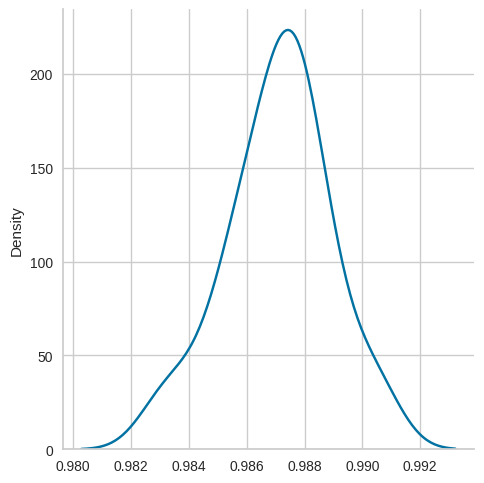

In [125]:
sns.displot(resultados_arvore, kind = 'kde');

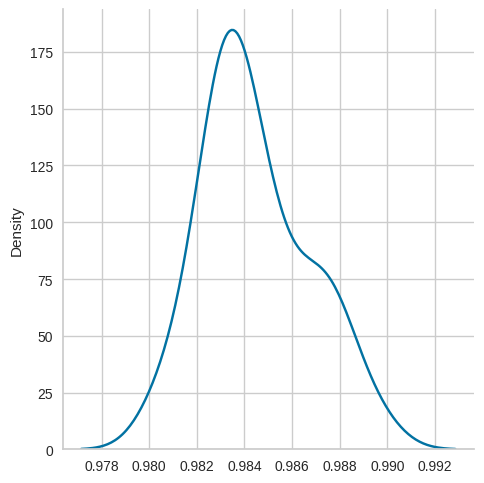

In [126]:
sns.displot(resultados_random_forest, kind = 'kde');

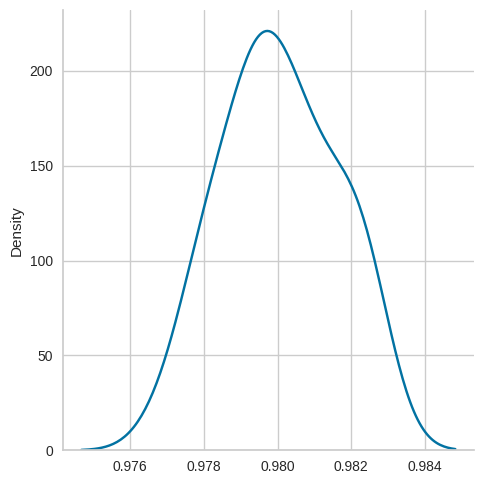

In [127]:
sns.displot(resultados_knn, kind = 'kde');

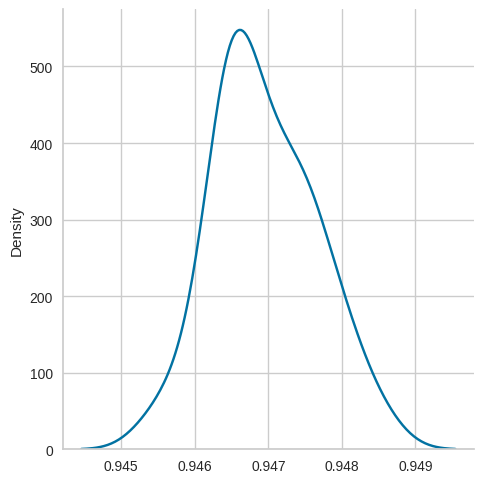

In [128]:
sns.displot(resultados_logistica, kind = 'kde');

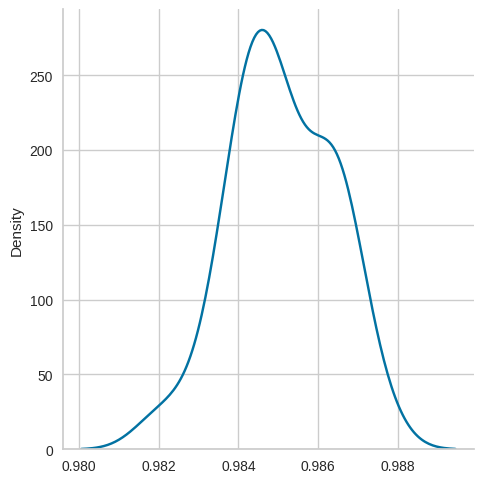

In [129]:
sns.displot(resultados_svm, kind = 'kde');

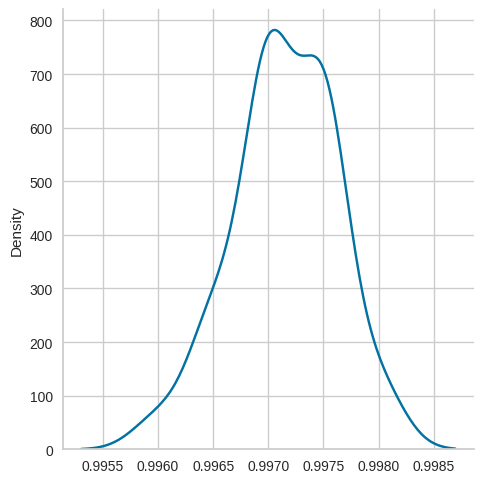

In [130]:
sns.displot(resultados_rede_neural, kind = 'kde');

## Teste de hipótese com ANOVA e Tukey


In [131]:
from scipy.stats import f_oneway

In [132]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

2.568202291628884e-179

In [133]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [134]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [135]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9860,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9875,arvore
4,0.9880,arvore
...,...,...
175,0.9980,rede_neural
176,0.9975,rede_neural
177,0.9970,rede_neural
178,0.9975,rede_neural


In [136]:
from statsmodels.stats.multicomp import MultiComparison

In [137]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [138]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn   -0.007    0.0 -0.0081  -0.006   True
       arvore     logistica  -0.0402    0.0 -0.0412 -0.0391   True
       arvore random_forest  -0.0026    0.0 -0.0037 -0.0016   True
       arvore   rede_neural     0.01    0.0   0.009  0.0111   True
       arvore           svm   -0.002    0.0 -0.0031 -0.0009   True
          knn     logistica  -0.0331    0.0 -0.0342  -0.032   True
          knn random_forest   0.0044    0.0  0.0033  0.0055   True
          knn   rede_neural   0.0171    0.0   0.016  0.0182   True
          knn           svm    0.005    0.0   0.004  0.0061   True
    logistica random_forest   0.0375    0.0  0.0364  0.0386   True
    logistica   rede_neural   0.0502    0.0  0.0491  0.0513   True
    logistica           svm   0.0381    0.0  0.0371  0.0392   

In [139]:
resultados.mean()

Arvore           0.987100
Random forest    0.984450
KNN              0.980050
Logistica        0.946950
SVM              0.985083
Rede neural      0.997150
dtype: float64

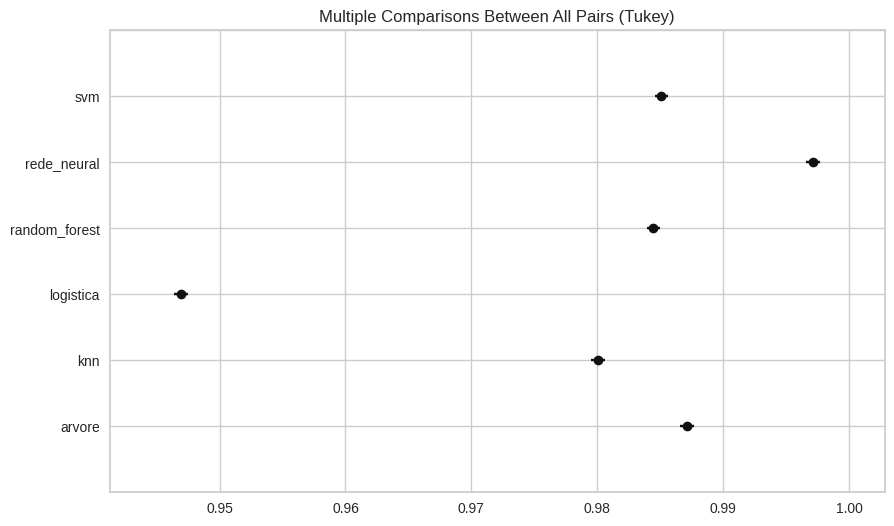

In [140]:
teste_estatistico.plot_simultaneous();

# Salvar um classificador já treinado


In [141]:
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [142]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)

In [143]:
X_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [144]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [145]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size = 56, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(batch_size=56)

In [146]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [147]:
classificador_svm = SVC(C = 2.0, kernel='rbf', probability=True)
classificador_svm.fit(X_credit, y_credit)

SVC(C=2.0, probability=True)

In [148]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

# Carregar um classificador já treinado


In [149]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [157]:
novo_registro = X_credit[0]
novo_registro

array([-1.3754462 ,  0.50631087,  0.10980934])

In [158]:
novo_registro.shape

(3,)

In [159]:
novo_registro = novo_registro.reshape(1, -1)
novo_registro.shape

(1, 3)

In [160]:
novo_registro

array([[-1.3754462 ,  0.50631087,  0.10980934]])

In [161]:
rede_neural.predict(novo_registro)

array([0])

In [162]:
arvore.predict(novo_registro)

array([0])

In [163]:
svm.predict(novo_registro)

array([0])